## Milestone 4:

### Data Analysis and Visualisation.

A deeper explore of the data to drive insights to inform business decisions that may stimulate changes to be made to the website and marketing strategies. 

## Milestone 4, Task 1:
What are our customers doing?
Questions to explore:
1. Are sales proportionally happening more on weekends?
2. Which regions are generating the most revenue currently?
3. Is there any particular website traffic that stands out when generating sales?
4. What percentage of time is spent on the website performing administrative/product or informational related tasks?
5. Are there any informational/administrative tasks which users spend time doing most?
6. What is the breakdown of months making the most sales?

In [1]:
from plotter import Plotter
import pandas as pd
import psycopg2
import seaborn as sns

In [2]:
file_path = 'C:/Users/Chris/Documents/AiCoreEDA_Project/customer_activity_transformed.csv'
df = pd.read_csv(file_path)

#### 1. Are sales proportionally happening more on weekends?
Two of the seven days in a week comprise the weekend. Therefore the theoretical probability of a sale occuring on a weekend would be 28.6%.

To investigate whether sales were any more likely to happen on the weekend let's create a df where 'revenue' == True:

In [3]:
df_revenue_true = df[df['revenue'] == True]

Then, the probability of the weekend can be calculated using the probability distribution method in the Plotter class:

In [4]:
revenue_true_plots = Plotter(df_revenue_true)

Value counts:
weekend
False    1414
True      414
Name: count, dtype: int64

Probability:
weekend
False    0.773523
True     0.226477
Name: proportion, dtype: float64


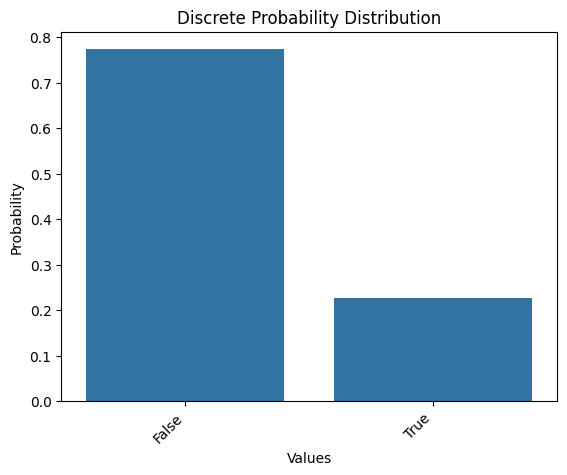

The mode of the distribution is False
The mean of the distribution is 0.22647702407002188
The median of the distribution is 0.0


In [5]:
revenue_true_plots.probability_distribution('weekend')

#### Results:

The data tell us that when a sale has occured the probability of that sale having occured on the weekend is 22.6%.
This is below the theoretical probability expected if there was an equal chance of a sale happening on any given day. Therefore, we know that sales are proportionally happening more during the week.

#### 2. Which regions are generating the most revenue currently?
Using the 'revenue' == True df, let's explore the regions which are generating the most revenue:

Value counts:
region
North America      719
Western Europe     310
Eastern Europe     187
Asia               177
South America      129
Africa             123
Northern Africa     88
Southern Africa     48
Oceania             47
Name: count, dtype: int64

Probability:
region
North America      0.393326
Western Europe     0.169584
Eastern Europe     0.102298
Asia               0.096827
South America      0.070569
Africa             0.067287
Northern Africa    0.048140
Southern Africa    0.026258
Oceania            0.025711
Name: proportion, dtype: float64


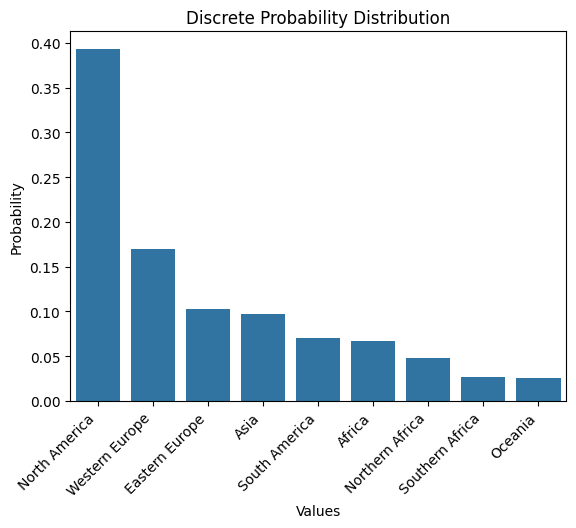

The mode of the distribution is North America
The mean cannot be calculated on this data series
The median cannot be calculated on this data series


In [6]:
revenue_true_plots.probability_distribution('region')

#### Results:
For the revenue generated across the year, the regions generating the most revenue were:
- North Americ (39.3 %)
- Western Europe (17.0 %)
- Eastern Europe (10.2 %)
- Asia (9.7 %)

#### 3. Is there any particular website traffic that stands out when generating sales?
Using the 'revenue' == True df, let's explore the website traffic which generated the most revenue:


Value counts:
traffic_type
Google search          836
Facebook ads           255
Bing search            167
Instagram ads          165
Youtube channel         85
Affiliate marketing     79
Twitter                 65
Youtube ads             49
Instagram Page          45
Tik Tok ads             36
Direct Traffic          23
Facebook page           11
Yahoo Search             4
Newsletter               3
Other                    2
Yandex search            1
Pinterest                1
Tik Tok page             1
Name: count, dtype: int64

Probability:
traffic_type
Google search          0.457330
Facebook ads           0.139497
Bing search            0.091357
Instagram ads          0.090263
Youtube channel        0.046499
Affiliate marketing    0.043217
Twitter                0.035558
Youtube ads            0.026805
Instagram Page         0.024617
Tik Tok ads            0.019694
Direct Traffic         0.012582
Facebook page          0.006018
Yahoo Search           0.002188
Newsletter        

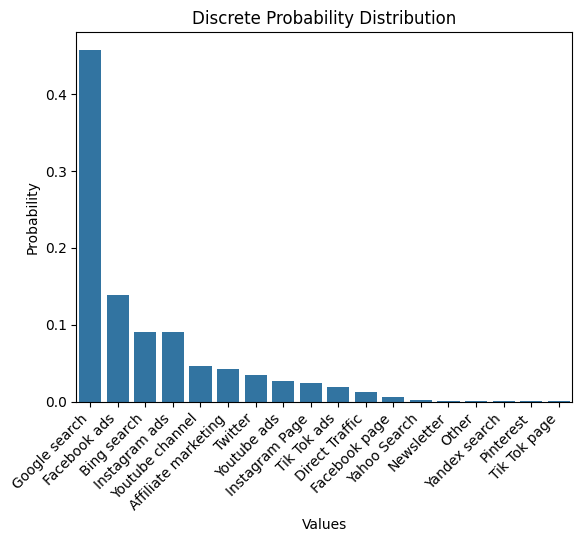

The mode of the distribution is Google search
The mean cannot be calculated on this data series
The median cannot be calculated on this data series


In [7]:
revenue_true_plots.probability_distribution('traffic_type')

#### Results:
The stand out performer is:
- Google search which resulted in 45.7 % of all sales.


#### 4. What percentage of time is spent on the website performing administrative/product or informational related tasks?


In [36]:
# Define a function that will calculate the time spent on each task as a percentage of total time spent across all tasks:

def time_spent(dataframe, *args):
    total_duration = 0
    for arg in args:
        sum_time = dataframe[arg].sum()
        total_duration = total_duration + sum_time
    for arg in args:
        print(f'The percentage of time spent on {arg.replace('_duration', '')} tasks is {(100 * dataframe[arg].sum() / total_duration).round(1)} %')

In [37]:
time_spent(df, 'administrative_duration', 'informational_duration', 'product_related_duration')

The percentage of time spent on administrative tasks is 24.0 %
The percentage of time spent on informational tasks is 9.6 %
The percentage of time spent on product_related tasks is 66.4 %


#### 5. Are there any informational/administrative tasks which users spend time doing most?
For this task I aim to list the tasks that the users were performing for the 5 longest periods of time

In [111]:
# Define a function to return the list:
 
def most_time(dataframe, sorting_column, task_column):
    sorted_data = dataframe.sort_values(by=sorting_column, ascending=False)
    return sorted_data[[task_column, sorting_column]].head()
    

In [112]:
# Use the function to produce the list for administrative tasks:

most_time(df, 'administrative_duration', 'administrative')

,administrative,administrative_duration
1672,0.693147,7.675546
2282,2.302585,7.667211
9201,2.708050,7.624245
11160,0.693147,7.576240
392,2.079442,7.576240


In [113]:
# Use the function to produce the list for informational tasks:

most_time(df, 'informational_duration', 'informational_plus_one')

,informational_plus_one,informational_duration
739,0.693147,7.595262
10180,1.098612,7.564238
1691,1.386294,7.547924
2954,1.791759,7.535350
1769,2.197225,7.517521


#### 6. What is the breakdown of months making the most sales?


Value counts:
month
Nov     709
May     328
Dec     264
Mar     169
Oct     128
Aug      70
Sep      69
Jul      67
June     19
Feb       5
Name: count, dtype: int64

Probability:
month
Nov     0.387856
May     0.179431
Dec     0.144420
Mar     0.092451
Oct     0.070022
Aug     0.038293
Sep     0.037746
Jul     0.036652
June    0.010394
Feb     0.002735
Name: proportion, dtype: float64


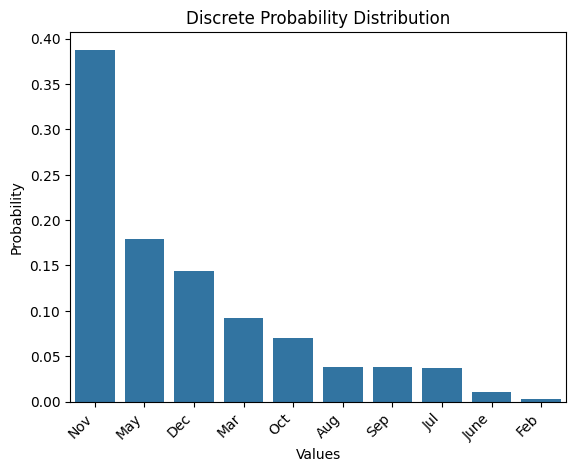

The mode of the distribution is Nov
The mean cannot be calculated on this data series
The median cannot be calculated on this data series


In [117]:
revenue_true_plots.probability_distribution('month')

#### Results:
For the revenue generated across the year, the months where the most sales were made were:
- Nov (38.8 %)
- May (18.0 %)
- Dec (14.4 %)